In [14]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import ot
import ot.plot

from jko_gradient import *

In [15]:
# parameters
n = 2000 # number of samples
bandwidth = 0.1 # bandwidth of kernel estimation
k = 10 # number of experiments

# true solution of JKO
mu_t = np.array([3, 3])
cov_t = np.array([[1, 0], [0, 1]])

mu_s = np.array([2, 2])
cov_s = np.array([[1, 0], [0, 1]])

In [16]:
ws_true = []
for i in range(20):
    # Samples from p0 and p1
    x_true_s = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s) # samples from true p1
    x0 = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t) # samples from p0
    ws_gd_true, _, _, _ = wasserstein_gradient(x_true_s, x0, r=0.5, h=bandwidth, draw=0)
    ws_true.append(l2_norm(ws_gd_true))

In [17]:
# Calculate the mean of the L2 norm of true wasserstein gradient
means = np.ones(11) * np.mean(ws_true)

In [18]:
# load results of one block JKO-iFlow
data = torch.load('results/2d_gaussian/pushed_data.pth')
results = [v for k, v in data.items()]

In [19]:
# initialization
wasserstein_grad_collection = [] # collect wasserstein gradient
wsgrad_norm = [] # collect l2 norm of the wasserstein gradient
xi1_norm = [] # collect l2 norm of xi1
xi2_norm = [] # collect l2 norm of xi2
score_norm = [] # collect l2 norm of the score function

# randomly draw n samples from results
results_sample = get_random_subset(results, n)

In [20]:
for i in range(11):
    xs = results_sample[i]
    ws_gd, xi1, xi2, score = wasserstein_gradient(xs, x0, r=0.5, h=bandwidth, draw=0)
    
    wasserstein_grad_collection.append(ws_gd)
    wsgrad_norm.append(l2_norm(ws_gd))
    xi1_norm.append(l2_norm(xi1))
    xi2_norm.append(l2_norm(xi2))
    score_norm.append(l2_norm(score))

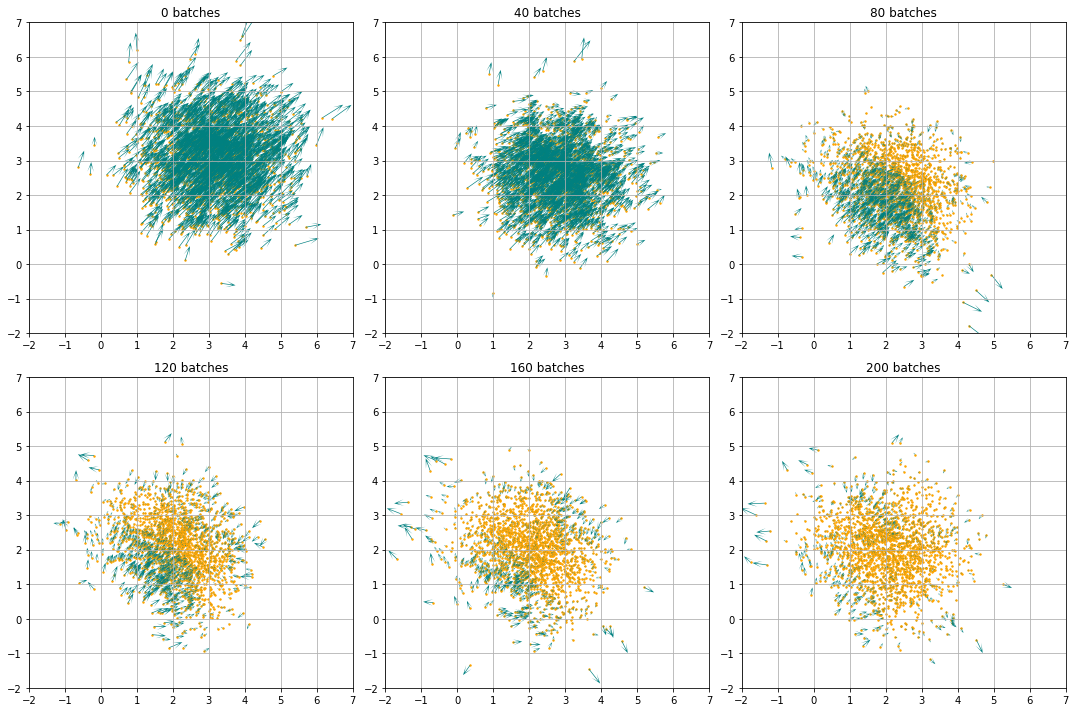

In [21]:
x_bounds = (-2, 7)
y_bounds = (-2, 7)
N = 6 # number of figures
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

k = 10 // (N-1)

plt.rcParams.update({'font.size': 10})

for i in range(N):
    
    xs = results_sample[k*i]
    
    vec_field = wasserstein_grad_collection[k*i]
    if i <= 2:
        ax = axes[0, i]
    else:
        ax = axes[1, i-3]
    
    ax.scatter(xs[:, 0], xs[:, 1], s=2, color='orange')
    
    ax.quiver(xs[:, 0], xs[:, 1], vec_field[:, 0], vec_field[:, 1], scale=10, scale_units='x',
              width=0.002, headwidth=10, headlength=15, fc='teal')

    #ax.set_xlabel(f'L2 norm of Wasserstein Gradient: {wsgrad_norm[k*i]}')
    #ax.set_ylabel('Y-axis')
    
    
    ax.set_xlim(x_bounds)
    ax.set_ylim(y_bounds)
    ax.set_title(f"{40*i} batches")
    ax.grid(True)

plt.tight_layout()
plt.show()

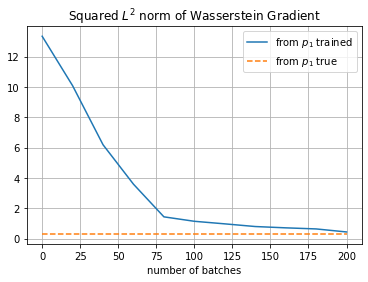

In [22]:
n_values = np.arange(0, 220, 20)
variances = np.var(ws_true)
plt.plot(n_values, wsgrad_norm, label='from $p_1$ trained')
plt.plot(n_values, means, linestyle='dashed', label='from $p_1$ true')
#plt.fill_between(n_values, means - np.sqrt(variances), means + np.sqrt(variances), color='b', alpha=0.2, label='±1 Standard Deviation')
plt.xlabel('number of batches')
plt.title('Squared $L^2$ norm of Wasserstein Gradient')
plt.grid()
plt.legend()
plt.show() 